#  FINDINGS #

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import sys 
import os

# Fixing routing issue
project_root = os.path.abspath('..')
sys.path.append(project_root)

from scripts import evaluate_model

df = pd.read_csv("../data/processed/golden_intent_labeled.csv")

feature_sets = [
    'TF-IDF',
    'TF-IDF + tweet_length',
    'TF-IDF + is_question',
    'TF-IDF + sentiment_score'
]

results = [
    evaluate_model(df),
    evaluate_model(df, extra_feature_names=['tweet_length']),
    evaluate_model(df, extra_feature_names=['is_question']),
    evaluate_model(df, extra_feature_names=['sentiment_score']),
]

macro_f1_scores = [.70, .69, .70, .72]

plt.figure(figsize=(8,5))
plt.bar(feature_sets, macro_f1_scores, color='skyblue')
plt.title('Macro F1 Scores by Feature Set')
plt.ylabel('F1 Score')
plt.ylim(.65, .75)
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

TypeError: 'module' object is not callable

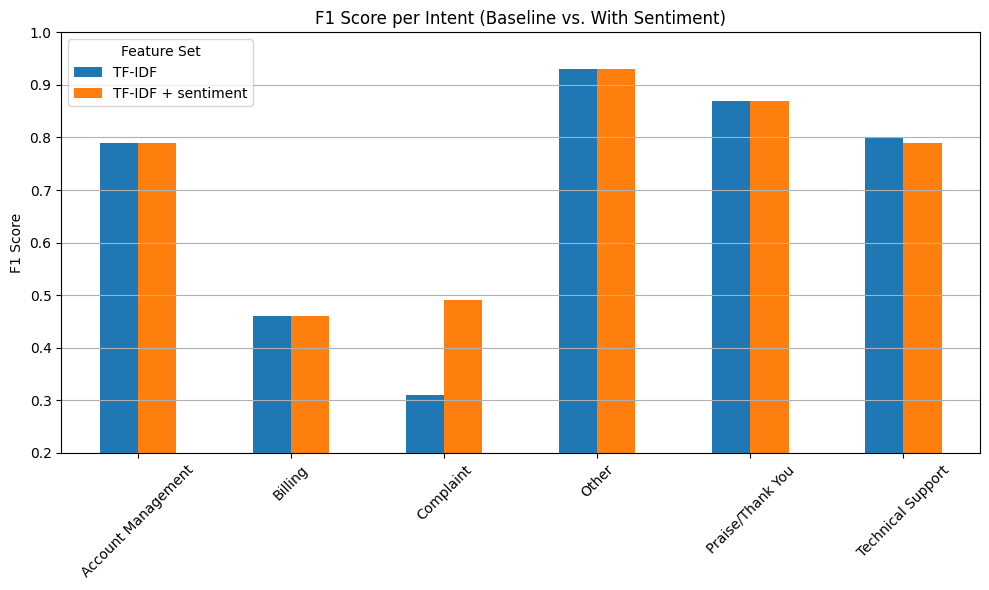

In [ ]:
f1_by_intent = {
    'TF-IDF': {
        'Account Management': 0.79,
        'Billing': 0.46,
        'Complaint': 0.31,
        'Other': 0.93,
        'Praise/Thank You': 0.87,
        'Technical Support': 0.80,
    },
    'TF-IDF + sentiment': {
        'Account Management': 0.79,
        'Billing': 0.46,
        'Complaint': 0.49,
        'Other': 0.93,
        'Praise/Thank You': 0.87,
        'Technical Support': 0.79,
    }
}

df_f1 = pd.DataFrame(f1_by_intent)

# Plot
df_f1.plot(kind='bar', figsize=(10, 6))
plt.title('F1 Score per Intent (Baseline vs. With Sentiment)')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.ylim(0.2, 1.0)
plt.grid(axis='y')
plt.legend(title='Feature Set')
plt.tight_layout()
plt.show()